In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
## cargamos el csv
data=pd.read_csv("archivos/publicidad.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


(array([ 4.,  8., 10., 17., 36., 51., 34., 23.,  8.,  9.]),
 array([-2.75990899, -2.24785684, -1.73580469, -1.22375254, -0.71170039,
        -0.19964823,  0.31240392,  0.82445607,  1.33650822,  1.84856037,
         2.36061252]),
 <BarContainer object of 10 artists>)

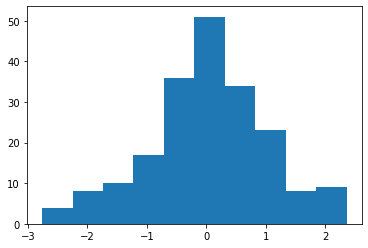

In [4]:
## creamos números al azar con una distribución estandar
a=np.random.randn(len(data))
## revisamos que sea una distribución estandar
plt.hist(a)

In [5]:
## dividimos los datos en testing y training 20% 80%
check=(a<0.8)
training=data[check]
testing=data[~check]

In [6]:
len(training), len(testing)

(158, 42)

In [10]:
lm=smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [11]:
## los p valores son 0 muy bueno
## entre menor es el dataset es menor la suma de las cuadrados de las diferencias SSD
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     665.9
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           7.94e-77
Time:                        10:10:39   Log-Likelihood:                -307.81
No. Observations:                 158   AIC:                             621.6
Df Residuals:                     155   BIC:                             630.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5800      0.347      7.436      0.000       1.895       3.265
TV             0.0478      0.002     29.796      0.000       0.045       0.051
Radio          0.1874      0.009     20.144      0.000       0.169       0.206
==============================================================================
Omnibus:                       43.198   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.411
Skew:                          -1.202   Prob(JB):                     8.58e-21
Kurtosis:                       5.874   Cond. No.                         440.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Modelo lineal
> Sales=2.5800+0.0478TV+0.1874Radio

In [13]:
lm_prediccion=lm.predict(training)

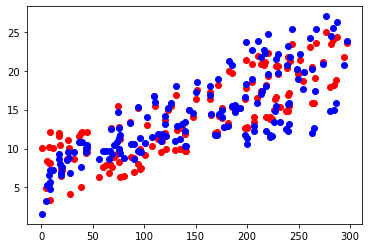

In [17]:
%matplotlib inline
plt.plot(training["TV"], lm_prediccion, "ro")
plt.plot(training["TV"], training["Sales"], "bo")

In [19]:
SSD=np.sum((lm_prediccion-training["Sales"])**2)

In [21]:
RSE=np.sqrt(SSD/(len(training)-1-2))
RSE

1.7139362848139659

In [24]:
error=RSE/training["Sales"].mean()
error

0.12144129019265729

## Validación del modelo con el conjunto de testing

In [26]:
## estos datos nunca se han utilizado en el modelo
sales_pred=lm.predict(testing)
sales_pred

6      11.475401
12     10.295429
13      8.665100
15     20.859795
18      9.729698
22      6.190648
30     21.885129
35     17.244905
40     16.439268
41     17.300399
59     18.180532
60      5.512297
68     19.082096
71     10.508660
83     14.189031
86     11.380898
88     11.579746
91      4.228282
92     19.264755
98     24.355742
99     16.857610
105    17.867455
106     5.836478
108     3.281183
114    15.088526
120    14.356968
135    13.696671
141    18.473521
142    19.342386
143     8.648449
150    18.603376
157     9.984627
165    14.427150
168    17.299556
170     7.144014
178    16.238333
179    12.370299
180    10.553312
187    17.093658
189     5.741453
192     4.170555
193    18.424431
dtype: float64

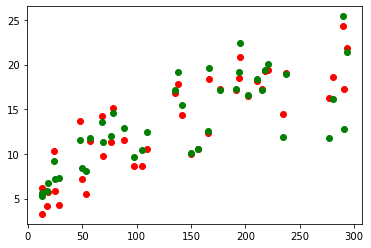

In [27]:
%matplotlib inline
plt.plot(testing["TV"], sales_pred, "ro")
plt.plot(testing["TV"], testing["Sales"], "go")

In [33]:
#suma de los cuadrados de la diferencia
SSD=np.sum((sales_pred-testing["Sales"])**2)
SSD

108.3054087612174

In [34]:
RSE=np.sqrt(SSD/(len(testing)-2-1))
RSE

1.6664518484217112

In [30]:
error=RSE/testing["Sales"].mean()

In [31]:
error

0.12180817548505372